In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_location  = '../../../../data/results/'

In [3]:
class TDigestRun(object):
    
    def __init__(self, f):
        self.filename = f
        
    def readable_name(self):
        return self.filename.rstrip('.csv').split('=')[-1]

    def set_df(self, df):
        self.df = df
        
    def plot_data(self):
        plt.plot(self.df['true quantile'][:200], self.df['abs. error'][:200], label=self.readable_name())

In [4]:
os.listdir(results_location)

['careful_iterations=1000_samples=4186822_scalefunc=K_0_delta=500_centroids=367_sizeBytes=5904_impl=merging_alt_true.csv',
 'careful_iterations=1000_samples=10585385_scalefunc=K_0_delta=500_centroids=344_sizeBytes=4160_impl=tree.csv',
 'careful_iterations=1000_samples=5283950_scalefunc=K_0_delta=500_centroids=366_sizeBytes=5888_impl=merging_alt_false.csv']

In [5]:
fnames = [x for x in os.listdir(results_location) if x.startswith('careful_iterations=1000')]
print(fnames)

['careful_iterations=1000_samples=4186822_scalefunc=K_0_delta=500_centroids=367_sizeBytes=5904_impl=merging_alt_true.csv', 'careful_iterations=1000_samples=10585385_scalefunc=K_0_delta=500_centroids=344_sizeBytes=4160_impl=tree.csv', 'careful_iterations=1000_samples=5283950_scalefunc=K_0_delta=500_centroids=366_sizeBytes=5888_impl=merging_alt_false.csv']


In [6]:
digests = []

for fname in fnames:
    tdr = TDigestRun(fname)
    with open(results_location + fname, 'r') as f:
        tdr.set_df(pd.read_csv(f, header=0, sep=';'))
    digests.append(tdr)

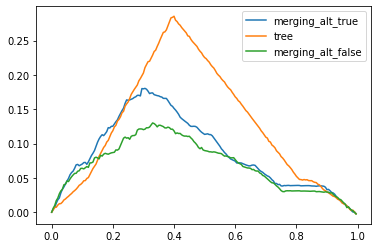

In [7]:
for t in digests:
    t.plot_data()

plt.legend()
plt.show()